### Dor no peito é um alarmante para a doença cardíaca?


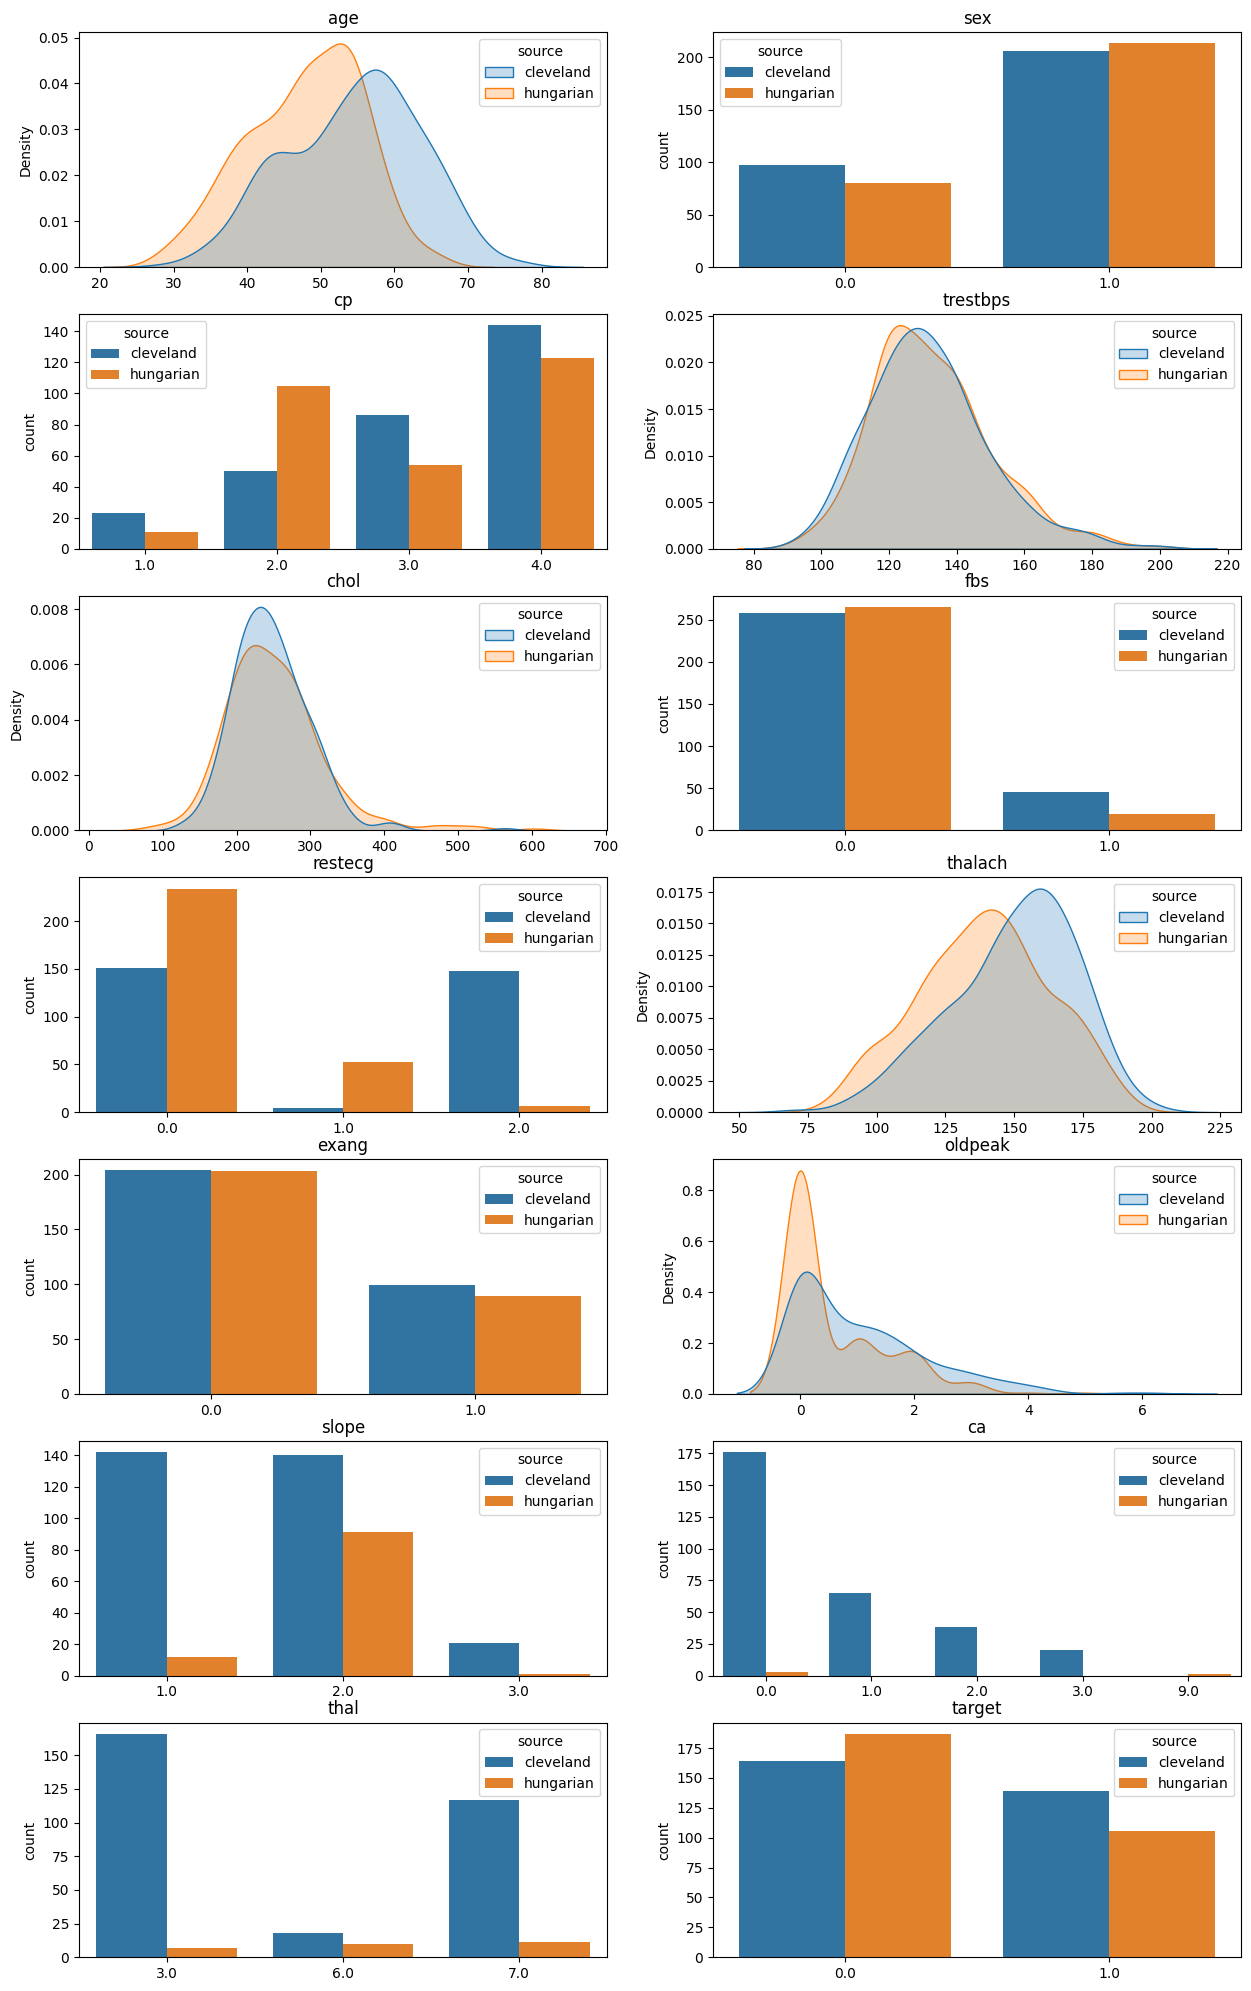

In [1]:
### Dor no peito: o quanto ela é um alarmante para a presença de doença cardíaca?

# Importando as bibliotecas necessárias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Essas serão as colunas do dataframe:
#    -- Only 14 used
#       -- 1. #3  (age)       
#       -- 2. #4  (sex)       
#       -- 3. #9  (cp)        
#       -- 4. #10 (trestbps)  
#       -- 5. #12 (chol)      
#       -- 6. #16 (fbs)       
#       -- 7. #19 (restecg)   
#       -- 8. #32 (thalach)   
#       -- 9. #38 (exang)     
#       -- 10. #40 (oldpeak)   
#       -- 11. #41 (slope)     
#       -- 12. #44 (ca)        
#       -- 13. #51 (thal)      
#       -- 14. #58 (num)       (the predicted attribute)

# um exemplo do dado cleveland.processed.data:
# 63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
# 67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
# 67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1

header = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# primeiro arquivo é cleveland.data
df1 = pd.read_csv('heart+disease/processed.cleveland.data', names=header)

# segundo arquivo é hungarian.data
df2 = pd.read_csv('heart+disease/reprocessed.hungarian.data', names=header, sep=" ")

# terceiro arquivo é switzerland.data
df3 = pd.read_csv('heart+disease/processed.switzerland.data', names=header)

# quarto arquivo é long-beach-va.data
df4 = pd.read_csv('heart+disease/processed.va.data', names=header)


# adicionamos um coluna fonte para identificar de onde veio o dado
df1['source'] = 'cleveland'
df2['source'] = 'hungarian'
df3['source'] = 'switzerland'
df4['source'] = 'long-beach-va'

# concatenamos os dois dataframes
df = pd.concat([df1, df2, df3, df4])

# Juntandos as categorias 1, 2, 3 e 4 da variável 'num' em uma só = 1
df['num'] = df['num'].replace([2, 3, 4], 1)
df['num'].unique()

# renomeando a coluna 'num' para 'target'
df = df.rename(columns={'num': 'target'})

# listando as categóricas
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# ajustando os dados faltantes
df = df.replace('?', -9)
df = df.fillna(-9)

# transformando todas as variáveis em int menos a source
for col in df.columns:
    if col != 'source':
        df[col] = df[col].astype(float)

# transformando as variáveis categóricas em int
for col in df.columns:
    if col in categorical_cols:
        df[col] = df[col].astype(int)

# substituindo o valor '-9' por 'NaN'
df = df.replace(-9, np.nan)

# tirando as duplicatas
df = df.drop_duplicates()

# # verificando em quais colunas temos dados faltantes
# print(df.isnull().sum())

# # retirando as colunas com mais de 55 dados faltantes
# df = df.dropna(thresh=55, axis=1)

# resetando os índices
df = df.reset_index(drop=True)

# Por a switzerland e a l.a. terem dados fundamentais faltantes, vamos retirá-la do dataframe
df = df[df['source'] != 'switzerland']
df = df[df['source'] != 'long-beach-va']


# # analisamos as distribuições das variáveis nas três fontes, fazemos sobrepostos com cada source de uma cor
# # primeiro para a idade
# sns.displot(df, x="age", hue="source", kind="kde", fill=True)
# plt.show()

# # agora para a trestbps
# sns.displot(df, x="trestbps", hue="source", kind="kde", fill=True)
# plt.show()

# # Construa um gráfico para analisar as distribuições das variáveis nas quatro fontes,
# #  sobrepostos com cada source de uma cor, mas faça isso para todas as variáveis e junte tudo em uma única figura.

# criando um grid 7x2
fig, axs = plt.subplots(7, 2, figsize=(15, 25))

# Para cada coluna do dataframe (menos a source), plote um gráfico de distribuição fazendo sobreposição das fontes (cada uma de uma cor)
for i, col in enumerate(df.columns):
    if col == 'source':
        continue

    # Verificando se a coluna é categórica
    if col in categorical_cols:
        # Se for categórica, plote um gráfico de contagem (countplot)
        sns.countplot(x=col, hue="source", data=df, ax=axs[i//2, i%2])
    else:
        # Se não for categórica, plote um gráfico de distribuição (kdeplot)
        sns.kdeplot(data=df, x=col, hue="source", ax=axs[i//2, i%2], fill=True, common_norm=False)


    # colocando o titulo de cada gráfico
    axs[i//2, i%2].set_title(col)

    # não colocar o xlabel
    axs[i//2, i%2].set_xlabel('')
    
plt.show()



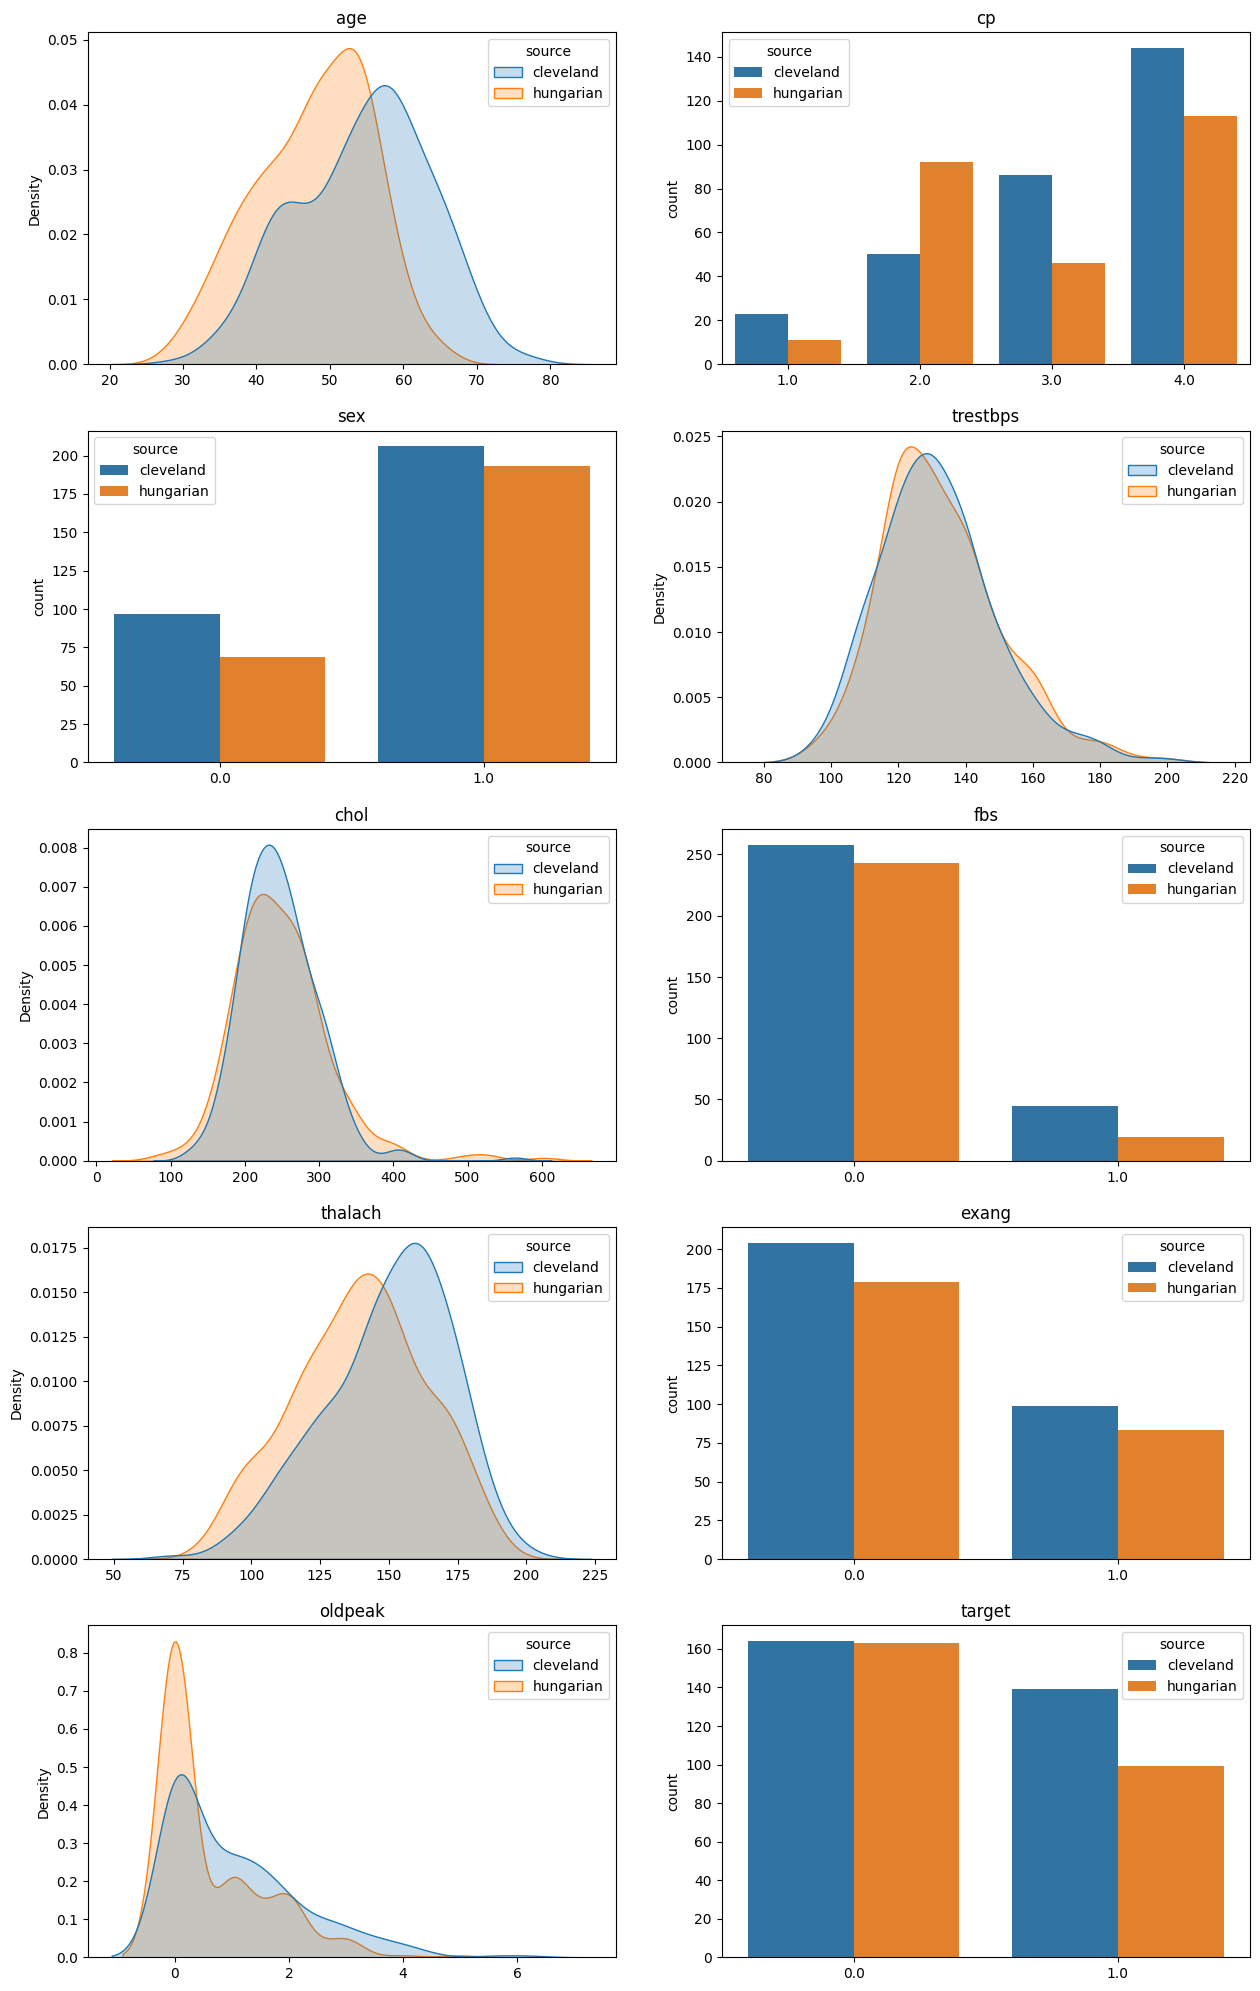

In [2]:
# variáveis de interesse: age, cp, sex, trestbps, chol, fbs, thalach, exang, oldpeak, thal, target
relevant_cols = ['age', 'cp', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'target', 'source']

# criando um dataframe apenas com as variáveis de interesse
df = df[relevant_cols]

# tirando os dados faltantes
df = df.dropna()

# resetando os índices
df = df.reset_index(drop=True)


# criando um grid 5x2
fig, axs = plt.subplots(5, 2, figsize=(15, 25))

# Para cada coluna do dataframe (menos a source), plote um gráfico de distribuição fazendo sobreposição das fontes (cada uma de uma cor)
for i, col in enumerate(df.columns):
    if col == 'source':
        continue

    # Verificando se a coluna é categórica
    if col in categorical_cols:
        # Se for categórica, plote um gráfico de contagem (countplot)
        sns.countplot(x=col, hue="source", data=df, ax=axs[i//2, i%2])
    else:
        # Se não for categórica, plote um gráfico de distribuição (kdeplot)
        sns.kdeplot(data=df, x=col, hue="source", ax=axs[i//2, i%2], fill=True, common_norm=False)

    # colocando o titulo de cada gráfico
    axs[i//2, i%2].set_title(col)

    # não colocar o xlabel
    axs[i//2, i%2].set_xlabel('')

plt.show()

# agora, escolhemos as variáveis que tem a distribuição mais parecida entre as fontes

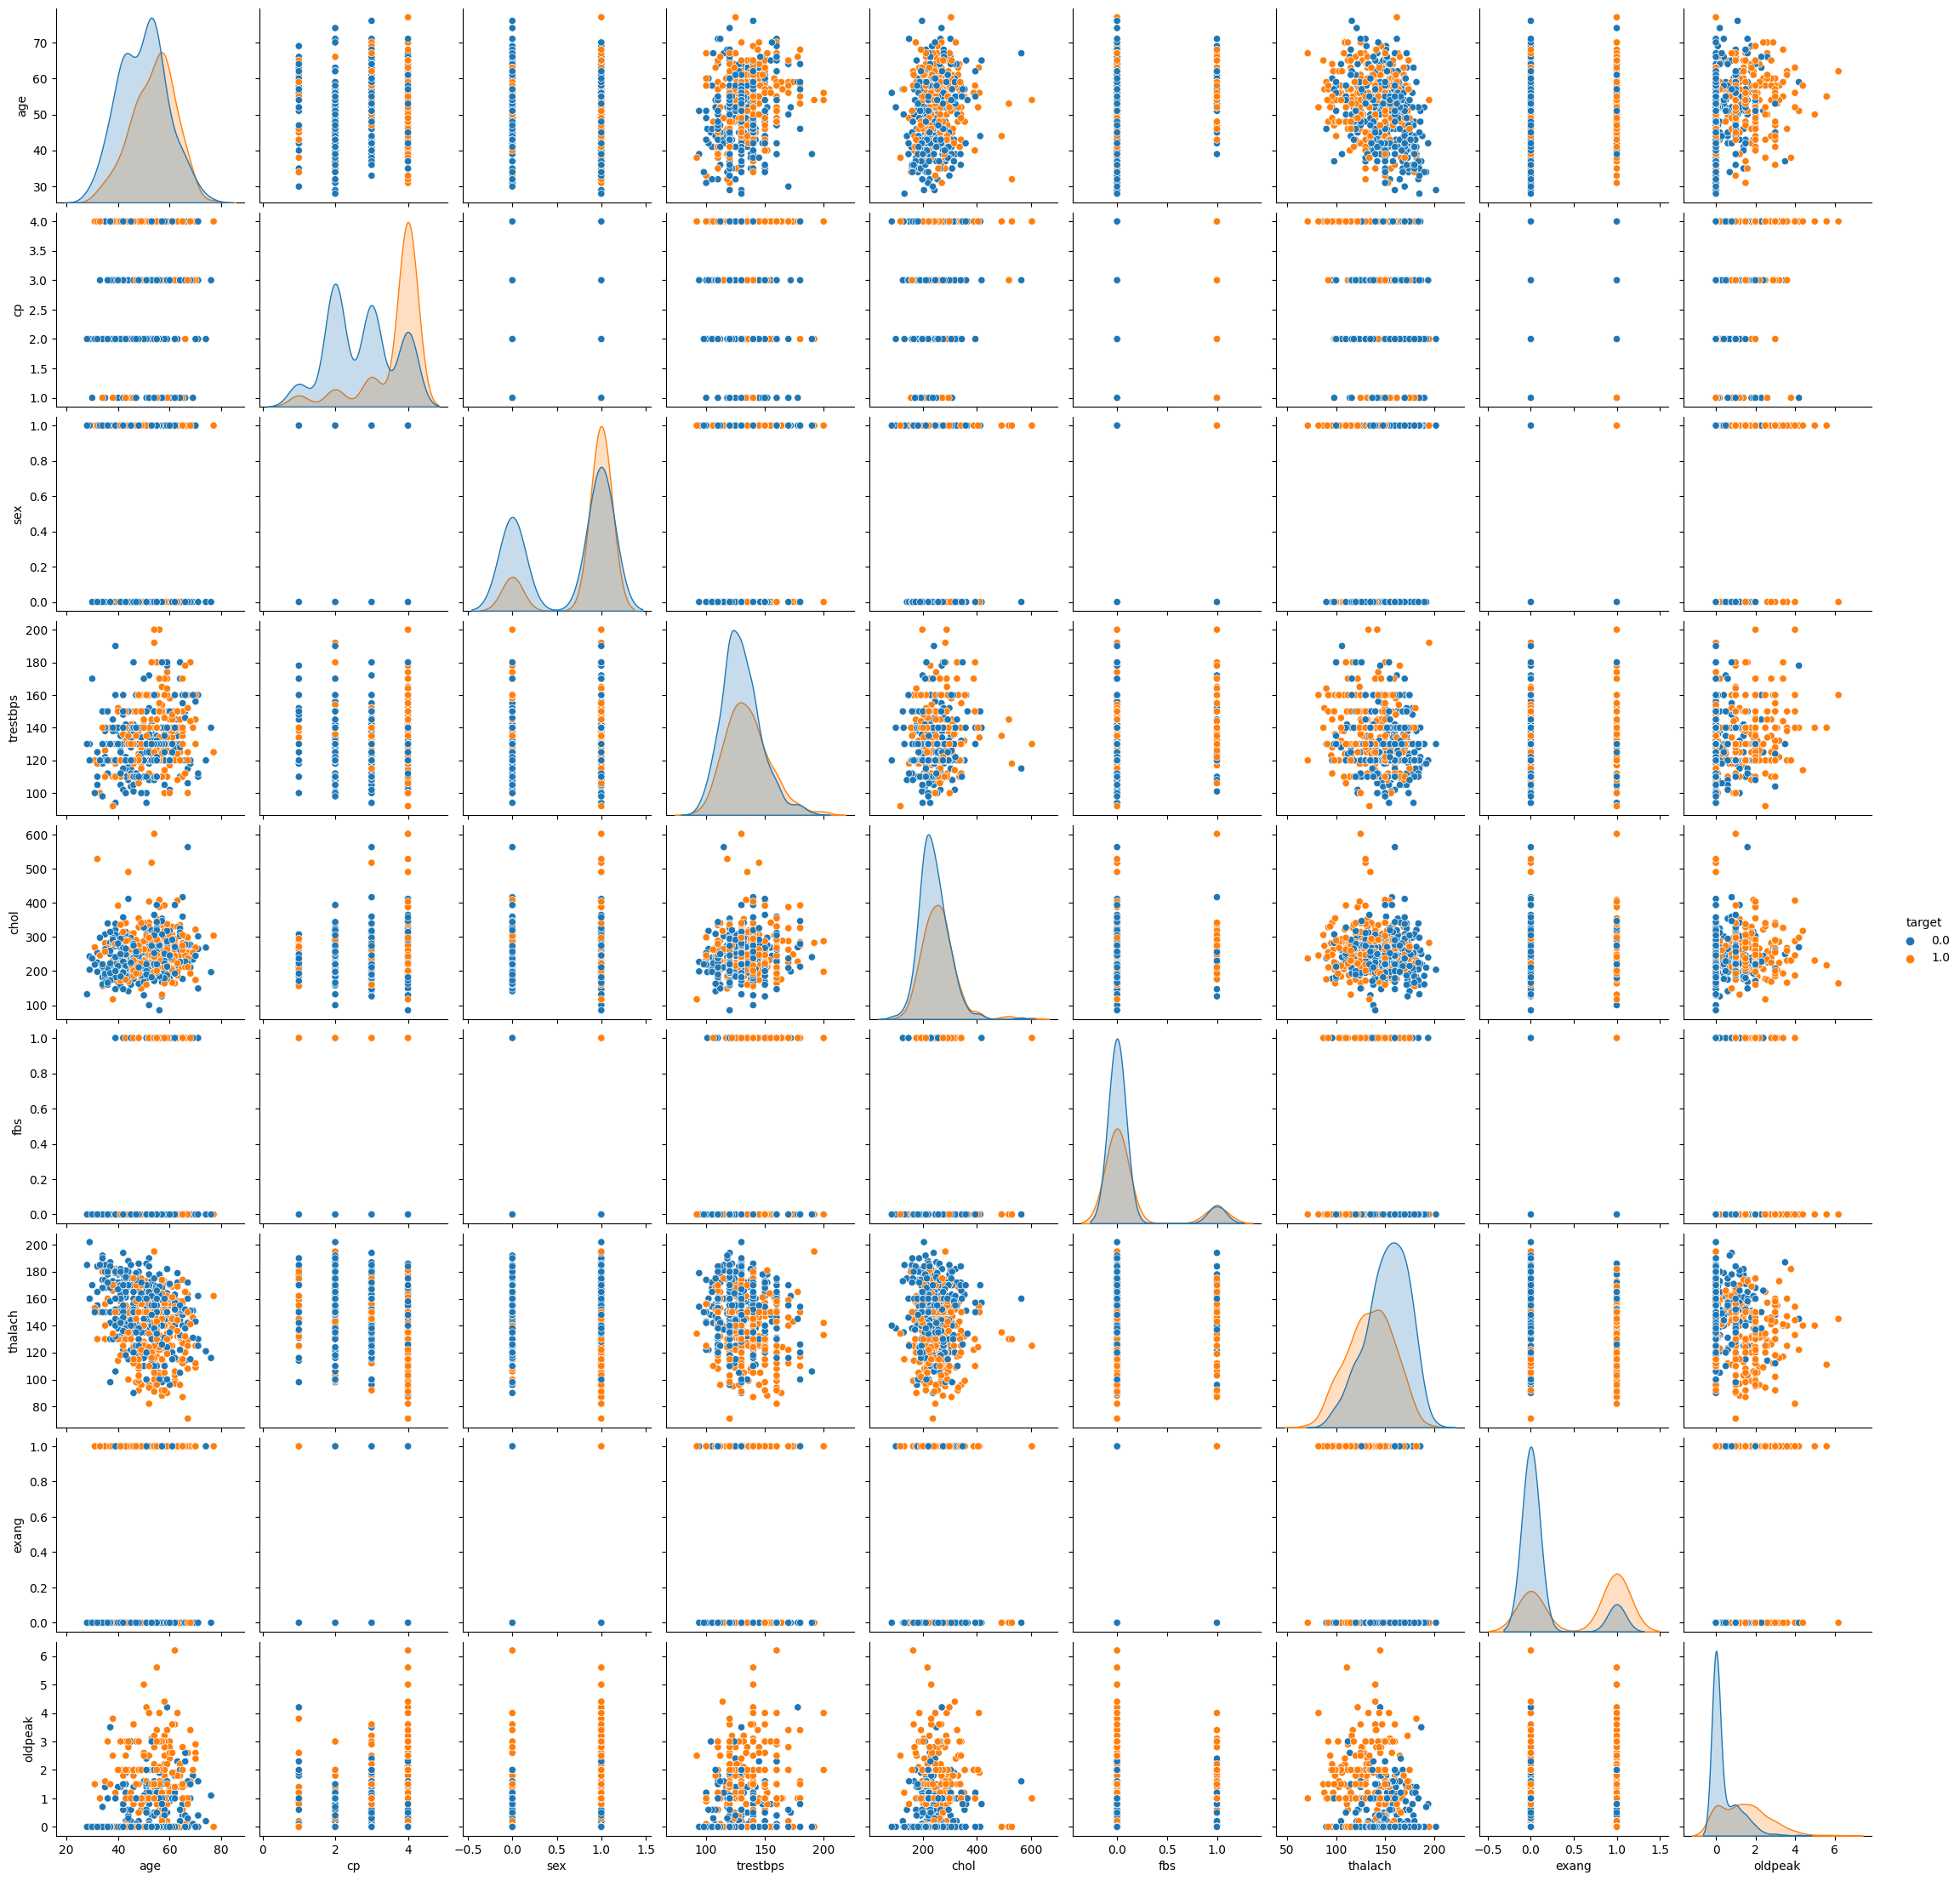

In [3]:
# Vamos agora verificar a relação entre as variáveis

# Fazendo o pairplot 
sns.pairplot(df, hue='target')

C:\Users\Cole\AppData\Local\Temp\ipykernel_8064\211344698.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


<Axes: >

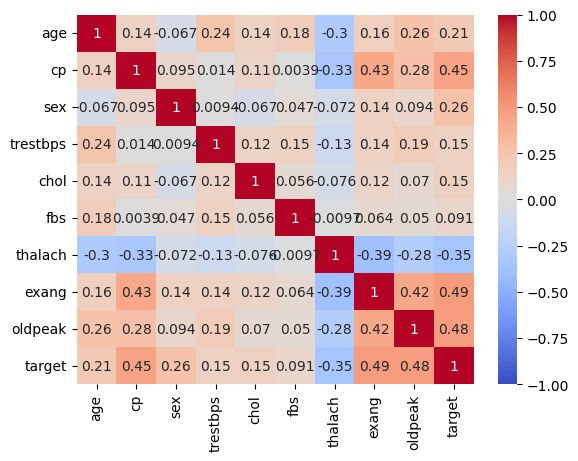

In [4]:
# fazendo um heatmap das correlações
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

C:\Users\Cole\AppData\Local\Temp\ipykernel_8064\4272576472.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['target'].abs().sort_values(ascending=False)[1:21].plot(kind='bar', figsize=(10,2))


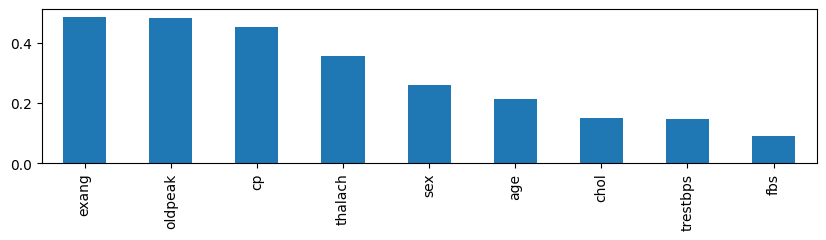

In [5]:
# ordenando as colunas por quantidade de informação de cada uma

# como correlação negativa também é correlação, vamos utilizar o valor absoluto, considerando apenas as 15 primeiras, excluindo a própria target
df.corr()['target'].abs().sort_values(ascending=False)[1:21].plot(kind='bar', figsize=(10,2))
plt.show()

In [6]:
# as variáveis que ajudam a responder nossos questionamentos são a 'cp' e a 'exang',
# relacionadas ao tipo de dor no peito e a angina induzida pelo exercício, respectivamente

# outras que parecem ter relevância são: oldpreak, thalach
# e, posteriormente, cabe avaliar sex e age

# índice de correlação entre cp e exang
df[['cp', 'exang']].corr()

# índice de correlação entre cp e oldpeak
df[['cp', 'oldpeak']].corr()

# índice de correlação entre cp e thalach
df[['cp', 'thalach']].corr()

# índice de correlação entre cp e trestbps
df[['cp', 'trestbps']].corr()




,cp,trestbps
cp,1.000000,0.013916
trestbps,0.013916,1.000000


,Não,Sim
Angina típica,0.33,0.25
Angina atípica,0.09,0.46
Dor não anginal,0.19,0.42
Assintomático,0.50,0.86


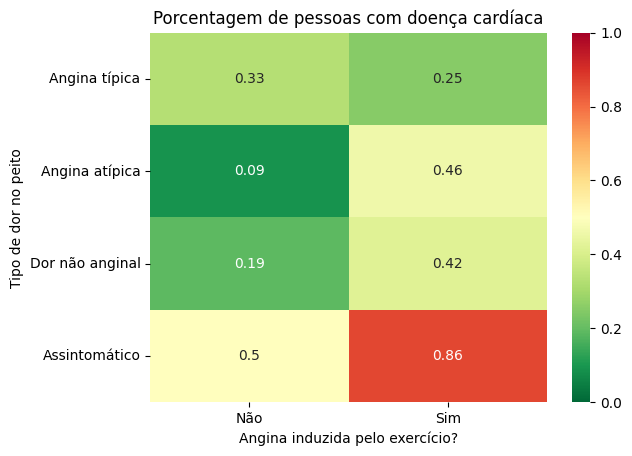

In [7]:
# vendo a porcentagem de targets agrupados por cp e exang
df.groupby(['cp', 'exang'])['target'].value_counts(normalize=True)
# cp   exang  target
# 1.0  0.0    0.0       0.666667
#             1.0       0.333333
#      1.0    0.0       0.750000
#             1.0       0.250000
# 2.0  0.0    0.0       0.914729
#             1.0       0.085271
#      1.0    0.0       0.538462
#             1.0       0.461538
# 3.0  0.0    0.0       0.814159
#             1.0       0.185841
#      1.0    0.0       0.578947
#             1.0       0.421053
# 4.0  0.0    1.0       0.504505
#             0.0       0.495495
#      1.0    1.0       0.856164
#             0.0       0.143836

# agora pivotando para fazer um heatmap com as porcentagens de targets com x = cp e y = exang, salvando a média do target para cada entrada
heat_df = df.groupby(['cp', 'exang'])['target'].mean().reset_index().pivot(index='cp', columns='exang', values='target')


# - cp: chest pain type
# -- Value 1: typical angina
# -- Value 2: atypical angina
# -- Value 3: non-anginal pain
# -- Value 4: asymptomatic
# - exang: exercise induced angina (1 = yes; 0 = no)

# alterando os valores de exang
heat_df.columns = ['Não', 'Sim']

# alterando os valores de cp
heat_df.index = ['Angina típica', 'Angina atípica', 'Dor não anginal', 'Assintomático']

# arredondando para 2 casas decimais e adicionando o símbolo de porcentagem
heat_df = heat_df.round(2)

sns.heatmap(heat_df, annot=True, cmap='RdYlGn_r', vmin=0, vmax=1)
# renomeando X label
plt.xlabel('Angina induzida pelo exercício?')
# # renomeando Y label
plt.ylabel('Tipo de dor no peito')

# adicionando titulo
plt.title('Porcentagem de pessoas com doença cardíaca')

heat_df


In [8]:
# qual a porcentagem de doentes que sentem cada tipo de dor no peito (cp)?
df.groupby('cp')['target'].value_counts(normalize=True)


cp   target
1.0  0.0       0.676471
     1.0       0.323529
2.0  0.0       0.880282
     1.0       0.119718
3.0  0.0       0.780303
     1.0       0.219697
4.0  1.0       0.704280
     0.0       0.295720
Name: target, dtype: float64

In [9]:
df.groupby('exang')['target'].value_counts(normalize=True)

exang  target
0.0    0.0       0.744125
       1.0       0.255875
1.0    1.0       0.769231
       0.0       0.230769
Name: target, dtype: float64

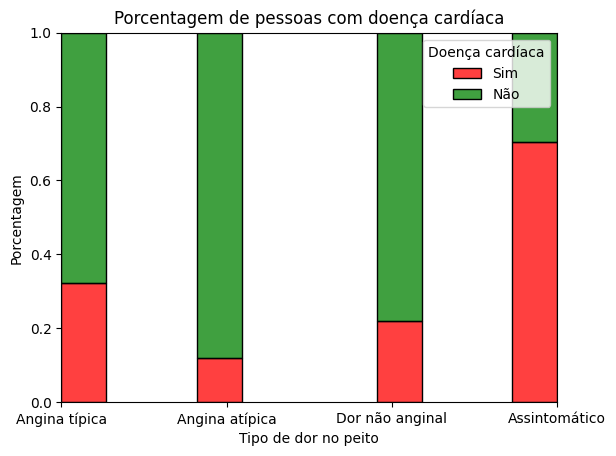

In [10]:
# Agora, vamos avaliar a relação individual de cada variável com o target criando histogramas

palette = ['green', 'red']

# criando gráfico empilhado conforme acima (porcentagem de doentes com cada tipo de dor no peito)
sns.histplot(data=df, x='cp', hue='target', multiple='fill', palette=palette)

# ajustando a legenda
plt.legend(['Sim', 'Não'], title='Doença cardíaca')

# renomeando X label
plt.xlabel('Tipo de dor no peito')

# renomeando Y label
plt.ylabel('Porcentagem')

# adicionando titulo
plt.title('Porcentagem de pessoas com doença cardíaca')

# alterando os ticks do eixo X
plt.xticks([1, 2, 3, 4], ['Angina típica', 'Angina atípica', 'Dor não anginal', 'Assintomático'])



plt.show()





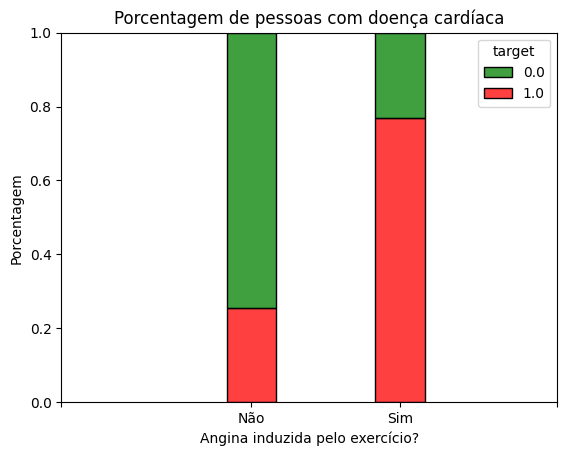

In [11]:
# Fazendo o mesmo para exang
sns.histplot(data=df,
x='exang',
hue='target',
multiple='fill',
palette=palette, 
# deixando as barras mais largar e mais próximas
binwidth=0.3)

# alterando os ticks do eixo X
plt.xticks([-1, 0.15, 1.05, 2], ['', 'Não', 'Sim', ''])

# ajustando os títulos dos eixos
plt.xlabel('Angina induzida pelo exercício?')
plt.ylabel('Porcentagem')

# titulo do gráfico
plt.title('Porcentagem de pessoas com doença cardíaca')

plt.show()




In [12]:
# Avaliando agora os papéis de oldpeak, thalach e trestbps

# coeficiente de correlação entre oldpeak e target
df[['oldpeak', 'target']].corr()

,oldpeak,target
oldpeak,1.000000,0.482162
target,0.482162,1.000000


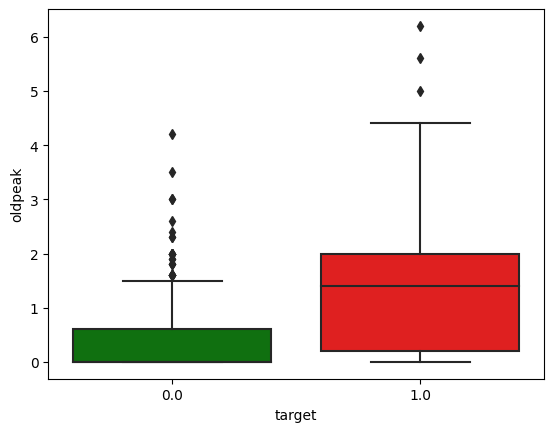

In [13]:
# Fazendo um boxplot oldpeak x target
sns.boxplot(x="target", y="oldpeak", data=df, palette=palette)
plt.show()

In [14]:
# Relação entre thalach e target
df[['thalach', 'target']].corr()


,thalach,target
thalach,1.000000,-0.354953
target,-0.354953,1.000000


In [ ]:
# métricas utilizadas:

# Acurácia (Accuracy) 
#A acurácia é uma métrica simples e intuitiva que mede a taxa de acertos do modelo em relação ao número total de exemplos.

# Precisão (Precision)
# A precisão é a proporção de exemplos positivos classificados corretamente em relação ao total de exemplos classificados como positivos.

# Recall (Recall)
# O recall é a proporção de exemplos positivos classificados corretamente em relação ao total de exemplos que realmente são positivos.

# AUC (Area Under the Curve)
# A AUC é uma métrica que avalia a qualidade do modelo em separar exemplos positivos de negativos. Quanto maior o valor da AUC, melhor o modelo está separando os exemplos.

# AIC (Akaike Information Criterion)
# O AIC é uma métrica que avalia a qualidade do modelo em relação à sua complexidade. Quanto menor o valor do AIC, melhor o modelo está ajustado aos dados.



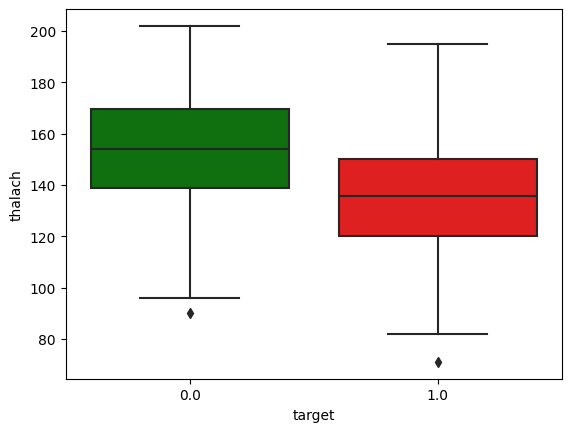

In [15]:
# gráfico de boxplot para thalach x target
sns.boxplot(x="target", y="thalach", data=df, palette=palette)
plt.show()


In [16]:
# coeficiente de correlação entre age e target
df[['age', 'target']].corr()

,age,target
age,1.000000,0.213408
target,0.213408,1.000000


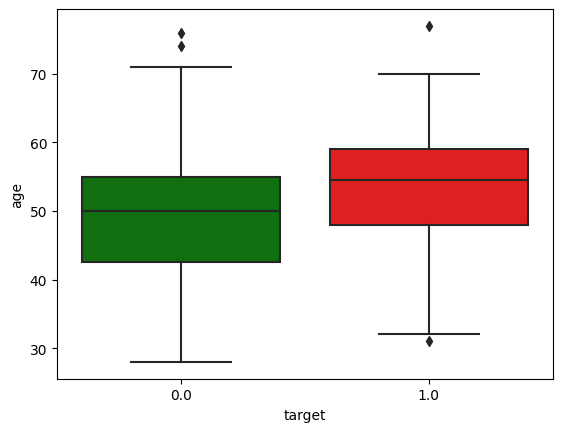

In [17]:
# gráfico de boxplot para age x target
sns.boxplot(x="target", y="age", data=df, palette=palette)
plt.show()

In [18]:
# coeficiente de correlação entre sex e target
df[['sex', 'target']].corr()

,sex,target
sex,1.000000,0.259108
target,0.259108,1.000000


In [19]:
df.groupby('sex')['target'].value_counts(normalize=True)

sex  target
0.0  0.0       0.777108
     1.0       0.222892
1.0  1.0       0.503759
     0.0       0.496241
Name: target, dtype: float64

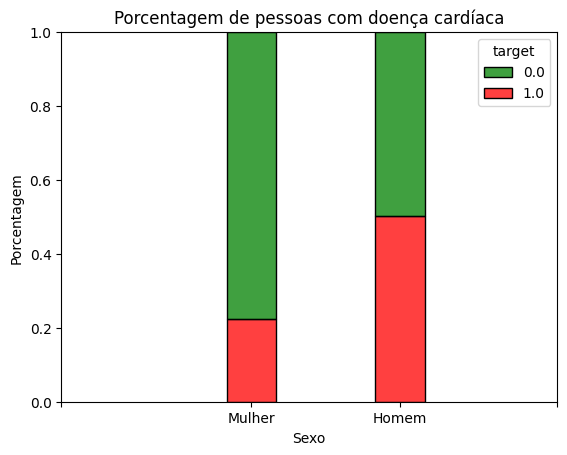

In [20]:
# Fazendo o mesmo para sex
sns.histplot(data=df,
x='sex',
hue='target',
multiple='fill',
palette=palette, 
# deixando as barras mais largas e mais próximas
binwidth=0.3)

# alterando os ticks do eixo X
plt.xticks([-1, 0.15, 1.05, 2], ['', 'Mulher', 'Homem', ''])

# ajustando os títulos dos eixos
plt.xlabel('Sexo')
plt.ylabel('Porcentagem')

# titulo do gráfico
plt.title('Porcentagem de pessoas com doença cardíaca')

plt.show()

<Axes: >

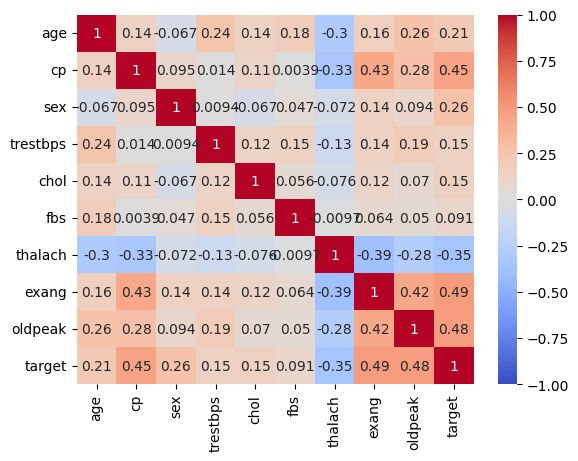

In [21]:
df_heart = df.drop(['source'], axis=1)

# fazendo um heatmap das correlações
sns.heatmap(df_heart.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


In [22]:
df_heart

# montando um modelo de regressão logística com sklearn para prever a doença cardíaca


# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# # Novo dataset com as variáveis de interesse, usaremos: age, sex, cp, exang, oldpeak, e thalach

# X = df_heart.drop('target', axis=1)
# y = df_heart['target']

# # separando os dados de treino e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# # instanciando o modelo
# model = LogisticRegression()

# # treinando o modelo
# model.fit(X_train, y_train)

# # fazendo previsões
# y_pred = model.predict(X_test)

# # verificando a acurácia
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

,age,cp,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
0,63.0,1.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0
1,67.0,4.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1.0
2,67.0,4.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1.0
3,37.0,3.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0
4,41.0,2.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...
560,51.0,3.0,0.0,110.0,190.0,0.0,120.0,0.0,0.0,0.0
561,36.0,2.0,1.0,120.0,166.0,0.0,180.0,0.0,0.0,0.0
562,48.0,3.0,1.0,110.0,211.0,0.0,138.0,0.0,0.0,0.0
563,47.0,2.0,0.0,140.0,257.0,0.0,135.0,0.0,1.0,0.0


In [103]:
from sklearn.model_selection import train_test_split

# renomeando as colunas
column_dict = {
    'age': 'x1',
    'sex': 'x2',
    'cp': 'x3',
    'exang': 'x4',
    'oldpeak': 'x5',
    'thalach': 'x6',
    'trestbps': 'x7',
    'chol': 'x8',
    'fbs': 'x9',
    'target': 'y'
}

df_heart = df_heart.rename(columns=column_dict)

# reordenando as colunas
df_heart = df_heart[column_dict.values()]


X = df_heart.drop('y', axis=1)
y = df_heart['y']

# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

df_heart.shape

(565, 10)

In [24]:
# fazendo codificação one-hot da variável cp
df_train = pd.get_dummies(df_train, columns=['x3'], prefix='x3')
df_test = pd.get_dummies(df_test, columns=['x3'], prefix='x3')


# tirando o .0 do final das colunas
df_train.columns = df_train.columns.str.replace('.0', '')
df_test.columns = df_test.columns.str.replace('.0', '')

C:\Users\Cole\AppData\Local\Temp\ipykernel_8064\250633840.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train.columns = df_train.columns.str.replace('.0', '')
C:\Users\Cole\AppData\Local\Temp\ipykernel_8064\250633840.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test.columns = df_test.columns.str.replace('.0', '')


In [88]:
# criando um modelo de regressão logística
model1 = smf.glm(formula='y ~ x1 + x2 + x4 + x5 + x6 + x7 + x8 + x9 + x3_1 + x3_2 + x3_3 + x3_4', data=df_train, family=sm.families.Binomial()).fit()

# usa o modelo para fazer previsões
y_proba = model1.predict(df_test)

# transforma as previsões em 0 ou 1
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

# avaliando o modelo

print("Acurácia:", accuracy_score(df_test['y'], y_pred))
print("Recall:", recall_score(df_test['y'], y_pred))
print("Precision:", precision_score(df_test['y'], y_pred))

Acurácia: 0.7705882352941177
Recall: 0.7746478873239436
Precision: 0.7051282051282052


In [62]:
# criando um modelo de regressão logística
model2 = smf.glm(formula='y ~ x1 + x2 + x5 + x6 + x7 + x8 + x9 + x4*x3_1 + x4*x3_2 + x4*x3_3 + x4*x3_4', data=df_train, family=sm.families.Binomial()).fit()

# usa o modelo para fazer previsões
y_proba = model2.predict(df_test)

# transforma as previsões em 0 ou 1
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

# avaliando o modelo

print("Acurácia:", accuracy_score(df_test['y'], y_pred))
print("Recall:", recall_score(df_test['y'], y_pred))
print("Precision:", precision_score(df_test['y'], y_pred))

Acurácia: 0.7705882352941177
Recall: 0.7746478873239436
Precision: 0.7051282051282052


In [61]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# criando um modelo de regressão logística
model3 = smf.glm(formula='y ~ x1 + x2 + x4*x5 + x6 + x7 + x8 + x9 + x3_1 + x3_2 + x3_3 + x3_4', data=df_train, family=sm.families.Binomial()).fit()

# usa o modelo para fazer previsões
y_proba = model3.predict(df_test)

# transforma as previsões em 0 ou 1
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

# avaliando o modelo

print("Acurácia:", accuracy_score(df_test['y'], y_pred))
print("Recall:", recall_score(df_test['y'], y_pred))
print("Precision:", precision_score(df_test['y'], y_pred))

Acurácia: 0.7764705882352941
Recall: 0.7605633802816901
Precision: 0.72


In [64]:

# criando um modelo de regressão logística
model4 = smf.glm(formula='y ~ x1 + x2 + x4 + x5 + x6 + x7 + x8 + x9', data=df_train, family=sm.families.Binomial()).fit()

# usa o modelo para fazer previsões
y_proba = model4.predict(df_test)

# transforma as previsões em 0 ou 1
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

# avaliando o modelo
print("Acurácia:", accuracy_score(df_test['y'], y_pred))
print("Recall:", recall_score(df_test['y'], y_pred))
print("Precision:", precision_score(df_test['y'], y_pred))

Acurácia: 0.8058823529411765
Recall: 0.7323943661971831
Precision: 0.7878787878787878


In [65]:
# criando um modelo de regressão logística
model5 = smf.glm(formula='y ~ x1 + x2 + x4*x5 + x6 + x7 + x8 + x9', data=df_train, family=sm.families.Binomial()).fit()

# usa o modelo para fazer previsões
y_proba = model5.predict(df_test)

# transforma as previsões em 0 ou 1
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

# avaliando o modelo

print("Acurácia:", accuracy_score(df_test['y'], y_pred))
print("Recall:", recall_score(df_test['y'], y_pred))
print("Precision:", precision_score(df_test['y'], y_pred))

Acurácia: 0.8235294117647058
Recall: 0.7464788732394366
Precision: 0.8153846153846154


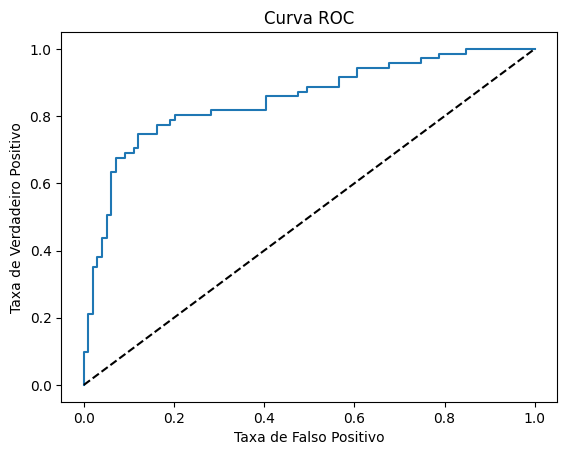

0.8497652582159624


In [97]:
# Fazendo a curva ROC
from sklearn.metrics import roc_curve, roc_auc_score

# calculando a probabilidade de ser 1
y_proba = model5.predict(df_test)

# calculando a curva ROC
fpr5, tpr5, thresholds = roc_curve(df_test['y'], y_proba)

# calculando a área sob a curva
area5 = roc_auc_score(df_test['y'], y_proba)

# plotando a curva ROC
plt.plot(fpr5, tpr5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

# Printando área sob a curva
print(area5)



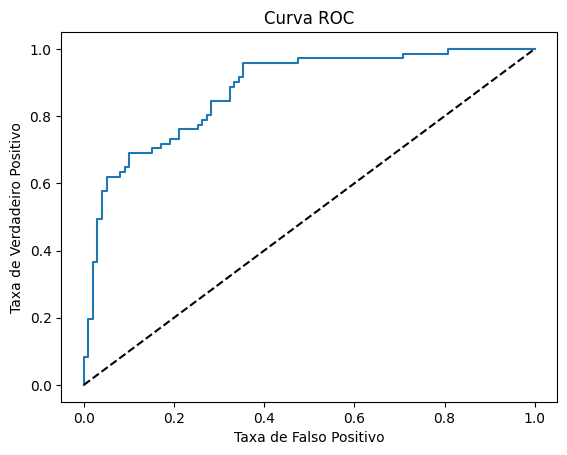

0.8769383980651587


In [96]:
# calculando a probabilidade de ser 1
y_proba = model3.predict(df_test)

# calculando a curva ROC
fpr3, tpr3, thresholds = roc_curve(df_test['y'], y_proba)

# calculando a área sob a curva
area3 = roc_auc_score(df_test['y'], y_proba)

# plotando a curva ROC
plt.plot(fpr3, tpr3)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

# Printando área sob a curva
print(area3)

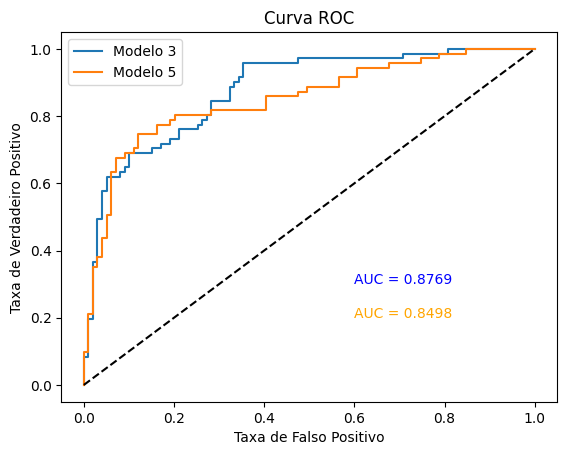

In [100]:
# colocando as duas curvas ROC no mesmo gráfico (do modelo 3 e do modelo 5)

# plotando a curva ROC
plt.plot(fpr3, tpr3)
plt.plot(fpr5, tpr5)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
# legenda de cada curva
plt.legend(['Modelo 3', 'Modelo 5'])

# incluindo a área sob a curva de cada modelo no gráfico com a cor do texto igual a cor da curva
plt.text(0.6, 0.3, 'AUC = %0.4f' % area3, color='blue')
plt.text(0.6, 0.2, 'AUC = %0.4f' % area5, color='orange')

plt.show()





In [101]:
# calculando AIC 
print('AIC do modelo 3: {}'.format(model3.aic))

AIC do modelo 3: 335.72213496067036


In [102]:
# calculando AIC 
print('AIC do modelo 5: {}'.format(model5.aic))

AIC do modelo 5: 368.7767662468726


In [ ]:
# O que acontece se verificarmos homens e mulheres separadamente?

Acurácia: 0.71900826446281
Recall: 0.8135593220338984
Precision: 0.676056338028169
##########################################################


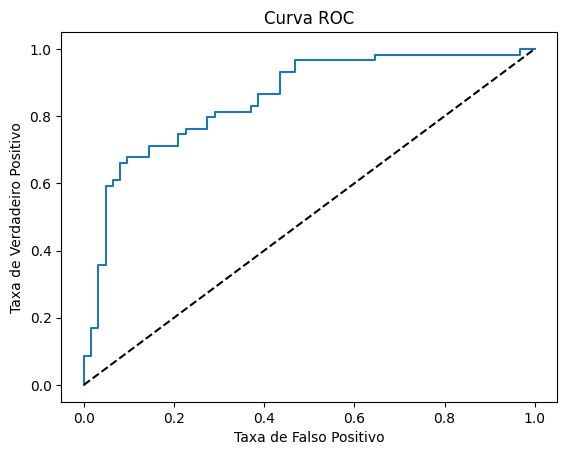

AUC: 0.8521049753963914
AIC: 245.59089755943603


In [84]:
# Fazendo um novo modelo, considerando apenas os homens
df_train_m = df_train[df_train['x2'] == 1]
df_test_m = df_test[df_test['x2'] == 1]

# criando um modelo de regressão logística
model6 = smf.glm(formula='y ~ x1 + x4*x5 + x6 + x3_1 + x3_2 + x3_3 + x3_4', data=df_train_m, family=sm.families.Binomial()).fit()

# usa o modelo para fazer previsões
y_proba = model6.predict(df_test_m)

# transforma as previsões em 0 ou 1
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

# avaliando o modelo

print("Acurácia:", accuracy_score(df_test_m['y'], y_pred))
print("Recall:", recall_score(df_test_m['y'], y_pred))
print("Precision:", precision_score(df_test_m['y'], y_pred))

print('##########################################################')

# calculando a curva ROC
fpr, tpr, thresholds = roc_curve(df_test_m['y'], y_proba)

# plotando a curva ROC
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

# Printando área sob a curva
print('AUC: {}'.format(roc_auc_score(df_test_m['y'], y_proba)))

print('AIC: {}'.format(model6.aic))

Acurácia: 0.7959183673469388
Recall: 0.6666666666666666
Precision: 0.5714285714285714
##########################################################


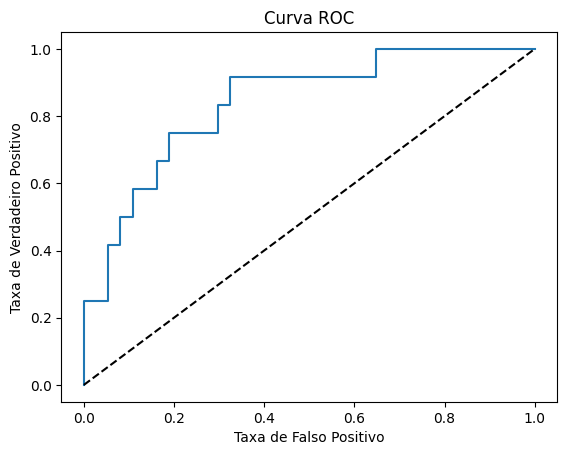

AUC: 0.8400900900900901
AIC: 90.4814780346624


In [83]:
# Fazendo um novo modelo, considerando apenas as mulheres
df_train_w = df_train[df_train['x2'] == 0]
df_test_w = df_test[df_test['x2'] == 0]

# criando um modelo de regressão logística
model7 = smf.glm(formula='y ~ x1 + x4*x5 + x6 + x7 + x8 + x9 + x3_1 + x3_2 + x3_3 + x3_4', data=df_train_w, family=sm.families.Binomial()).fit()

# usa o modelo para fazer previsões
y_proba = model7.predict(df_test_w)

# transforma as previsões em 0 ou 1
y_pred = y_proba.apply(lambda x: 1 if x > 0.5 else 0)

# avaliando o modelo

print("Acurácia:", accuracy_score(df_test_w['y'], y_pred))
print("Recall:", recall_score(df_test_w['y'], y_pred))
print("Precision:", precision_score(df_test_w['y'], y_pred))

print('##########################################################')

# calculando a curva ROC
fpr, tpr, thresholds = roc_curve(df_test_w['y'], y_proba)

# plotando a curva ROC
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

# Printando área sob a curva
print('AUC: {}'.format(roc_auc_score(df_test_w['y'], y_proba)))
print('AIC: {}'.format(model7.aic))

<Axes: xlabel='x5', ylabel='y'>

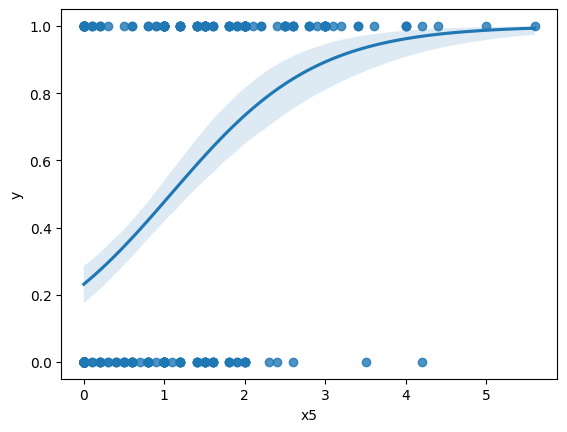

In [ ]:
# A regressão logística utiliza a curva logística para assim representar a relação entre a variável dependente e as 
# independentes. Os valores previstos portanto permanecem entre 0 e 1, sendo definidos pelos coeficientes estimados

# Traçando a curva logística do modelo
sns.regplot(x='x5', y='y', data=df_train, logistic=True)
